In [33]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
import scipy.stats as stats
import astropy.units as u
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
from bisect import bisect_left
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from IPython.display import Audio, display
def allDone():
    display(Audio(filename='beep.mp3', autoplay=True))
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
import corner
import numdifftools
from scipy.ndimage import interpolation
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from multiprocessing import Pool
import pickle
import h5py
import scipy
from matplotlib.pyplot import GridSpec

def get_spectrum(source_id):
    path = wdtable[wdtable['source_id'] == source_id][0]['specpath']
    try:
        f = fits.open(path)
        flux = f[1].data['flux']
        loglam = f[1].data['loglam']
        f.close()
        lam = 10**loglam
    except:
        print('Spectrum file missing...')
        return
    return lam,flux

filetable = Table.read('filetable.fits')
wdtable = Table.read('tremblay_final.fits')
print(len(wdtable))
wdtable = join(filetable,wdtable,keys = ['source_id'])

DA = (wdtable['spectral_class_1'] == 'DA')
wdtable = wdtable[DA]
print(len(wdtable))
plt.style.use('default')

5396
5366


In [21]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep',
 'vedant']

In [38]:
from wdtools.parametric import LineProfiles

In [54]:
lp = LineProfiles()

### Line Profiles Tool for White Dwarf Spectra ### 

Verbose: False, plot_profiles: False

	General class to fit Voigt profiles to the first 3 Balmer absorption lines, and then infer stellar labels.
	Uses a 25-tree random forest model by default, trained on 5326 spectra from the Sloan Digital Sky Survey. 
	Probabilistic prediction uses 100 boostrapped random forest models with 10 trees each, also SDSS-trained. 
	Ground truth labels are taken from Tremblay et al. (2019)
	Line profiles are fit using the LMFIT package via chi^2 minimization. 

	To get started, use LineProfiles.infer_labels(wavelength, flux)
	For more details, run help(LineProfiles)
	


In [55]:
%time lp.pretty_infer_labels(wl,fl)

Teff = 23272 ± 292 K, log(g) = 8.08 ± 0.07 dex
CPU times: user 557 ms, sys: 2.64 ms, total: 559 ms
Wall time: 558 ms


array([2.32725144e+04, 2.92731472e+02, 8.08054755e+00, 6.70524858e-02])

In [56]:
table = wdtable[np.random.randint(0,len(wdtable), len(wdtable))]
n = 25
preds = [];
for obj in tqdm(table[0:n]):
    wl,fl = get_spectrum(obj['source_id'])
    preds.append(lp.labels_from_spectrum(wl,fl))

100%|██████████| 25/25 [00:14<00:00,  1.67it/s]


In [62]:
preds = np.asarray(preds)

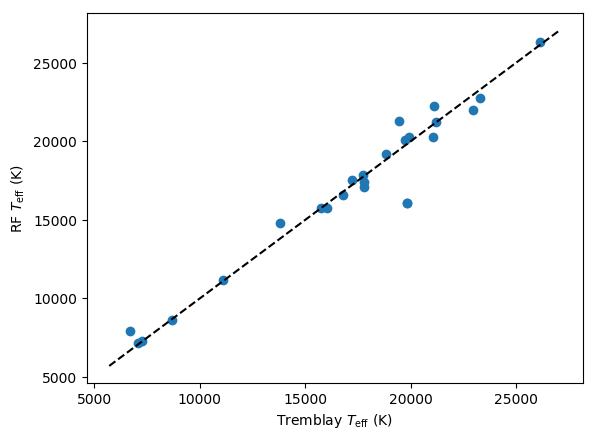

In [63]:
f = plt.scatter(table[0:n]['spec_Teff'],preds[:,0])
plt.xlabel('Tremblay $T_{\mathrm{eff}}$ (K)')
plt.ylabel('RF $T_{\mathrm{eff}}$ (K)')
x = np.linspace(f.axes.get_xlim()[0],f.axes.get_xlim()[1],1000)
plt.plot(x,x,'k--')

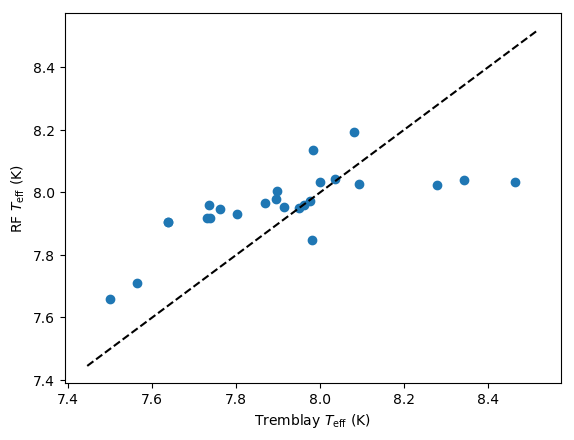

In [64]:
f = plt.scatter(table[0:n]['spec_logg'],preds[:,1])
plt.xlabel('Tremblay $T_{\mathrm{eff}}$ (K)')
plt.ylabel('RF $T_{\mathrm{eff}}$ (K)')
x = np.linspace(f.axes.get_xlim()[0],f.axes.get_xlim()[1],1000)
plt.plot(x,x,'k--')

In [45]:
lp = LineProfiles(plot_profiles = True)

### Line Profiles Tool for White Dwarf Spectra ### 

Verbose: False, plot_profiles: True

	General class to fit Voigt profiles to the first 3 Balmer absorption lines, and then infer stellar labels.
	Uses a 25-tree random forest model by default, trained on 5326 spectra from the Sloan Digital Sky Survey. 
	Probabilistic prediction uses 100 boostrapped random forest models with 10 trees each, also SDSS-trained. 
	Ground truth labels are taken from Tremblay et al. (2019)
	Line profiles are fit using the LMFIT package via chi^2 minimization. 

	To get started, use LineProfiles.infer_labels(wavelength, flux)
	For more details, run help(LineProfiles)
	


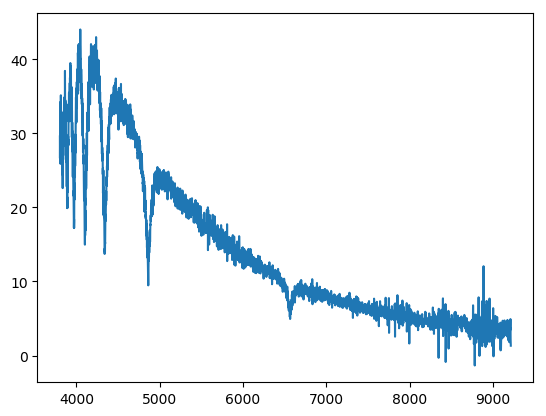

In [50]:
jj = np.random.randint(0,len(wdtable))
wl,fl = get_spectrum(wdtable['source_id'][jj])
plt.plot(wl,fl)

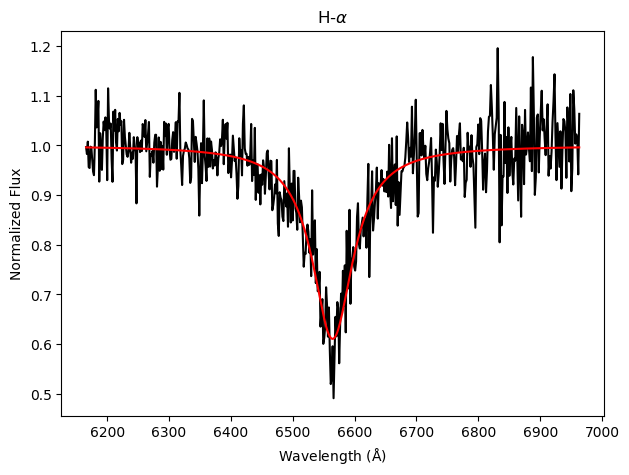

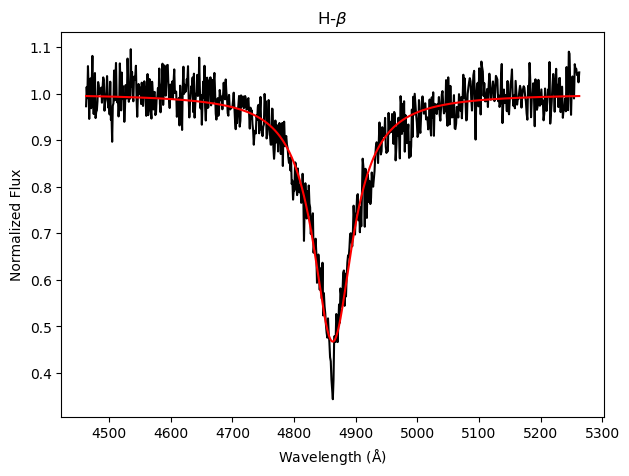

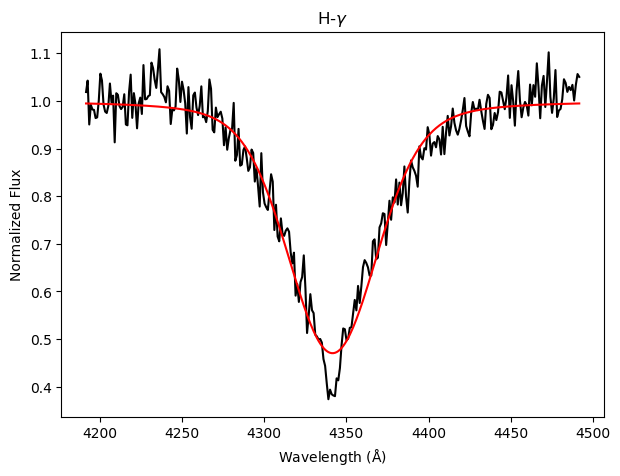

Teff = 15052 ± 466 K, log(g) = 8.04 ± 0.06 dex


In [51]:
lp.pretty_infer_labels(wl,fl);

In [52]:
wdtable[jj][['spec_Teff', 'spec_logg']]

spec_Teff,spec_logg
float64,float64
14308.0,7.746
